In [95]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [96]:
df = pd.read_csv('googleplaystore.csv')

In [97]:
df.shape

(10841, 13)

In [98]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [99]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [100]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [102]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [103]:
#vamos eliminar as features que não interessam a análise no momento.

df = df[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       #'Price',
    'Content Rating']].copy()
    #'Genres', 'Last Updated', 'Current Ver', 'Android Ver']]

In [104]:
df.shape

(10841, 8)

In [105]:
#Verificar missing values.

df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Content Rating       1
dtype: int64

In [106]:
#Eliminar as linhas com valores nulo em 'rating'.
#Como algumas linhas serão apagadas é necessário resetar o index.

df = df.dropna().reset_index(drop=True).copy()

In [107]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Content Rating    0
dtype: int64

In [108]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone
...,...,...,...,...,...,...,...,...
9361,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,Everyone
9362,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,Everyone
9363,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,Everyone
9364,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,Mature 17+


In [109]:
#Procurando linhas duplicadas.

df.duplicated().sum()

476

In [110]:
#Consultando linhas duplicadas

df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
218,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,Everyone
225,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,Everyone
228,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,Everyone
245,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,Everyone
250,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,Everyone
...,...,...,...,...,...,...,...,...
7648,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,Everyone
7652,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,Everyone
8782,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,Everyone
9117,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,Everyone


In [111]:
#Consultando um conjunto de linhas duplicadas

df.loc[df['App']=='Quick PDF Scanner + OCR FREE']

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
212,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,Everyone
218,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,Everyone
274,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,Everyone


In [112]:
#Eliminando as linhas duplicadas e resetando o index. 

df = df.drop_duplicates().reset_index(drop=True).copy()

In [113]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone
...,...,...,...,...,...,...,...,...
8885,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,Everyone
8886,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,Everyone
8887,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,Everyone
8888,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,Mature 17+


In [114]:
#Verificando se existem duplicações de aplicativos consultando as linhas em que o valor de App é duplicado.

df.loc[df.duplicated(subset=['App'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
249,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,Everyone
250,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35M,"100,000,000+",Free,Everyone
251,Slack,BUSINESS,4.4,51510,Varies with device,"5,000,000+",Free,Everyone
336,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,Everyone
337,imo free video calls and chat,COMMUNICATION,4.3,4785988,11M,"500,000,000+",Free,Everyone
...,...,...,...,...,...,...,...,...
8762,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815,Varies with device,"100,000,000+",Free,Everyone
8800,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,Mature 17+
8805,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,Everyone
8815,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,Everyone


In [115]:
#Verificando uma delas para investigar porque houve duplicação.

df.query('App =="Quick PDF Scanner + OCR FREE"')

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
212,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,Everyone
249,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,Everyone


In [116]:
#Armazenando o dataset com uma cópia de todas as linhas onde não há duplicação do valor de App, que afinal se refere 
#ao aplicativo em questão.

df = df.loc[~df.duplicated(subset=['App'])].reset_index(drop=True).copy()

In [117]:
#dataset limpo

df

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone
...,...,...,...,...,...,...,...,...
8191,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,Everyone
8192,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,Everyone
8193,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,Everyone
8194,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,Mature 17+


In [118]:
#Vamos mudar o tipo das features Installs e Reviews

import re

In [119]:
#Tornando a coluna Installs numérica e removendo o sinal de + para isso.

df['Installs'] = df['Installs'].apply(lambda x: re.sub('[^0-9\.]+', '', x)).astype(float)

In [120]:
df['Size'].value_counts()

Varies with device    1169
14M                    149
12M                    146
11M                    144
13M                    143
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 414, dtype: int64

In [121]:
df['Reviews'] = df['Reviews'].astype(float)

In [122]:
#Vamos olhar como estão distribuidos os valores de algumas features

df['Content Rating'].value_counts()

Everyone           6618
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [123]:
df['Category'].value_counts()

FAMILY                 1608
GAME                    912
TOOLS                   718
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         298
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           62
ART_AND_DESIGN           61
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

# Fazendo perguntas aos dados


1-Quais são os apps com melhor rating\
2-Quais são as categorias mais frequentes entre os apps com melhor rating\
3-Qual a média de rating para cada categoria de app, mostrar as 10 maiores\
4-Quais são os apps com mais reviews\
5-Qual a média de review para cada categoria de app, mostrar as 10 maiores\
6-Quais são os apps mais instaldos\
7-Quais são as categorias que mais aparecem dentro dos 20 apps mais instalados?\
8-Quais são os apps com menor rating\
9-Quais as categorias de app menos instalados\
10-Quais são os apps com menos reviews\
11-Qual a média de rating dos apps pagos?


## 1-Quais são os apps com melhor rating

In [124]:
df[['App', 'Rating']].sort_values('Rating', ascending=False).reset_index().head(250)

,index,App,Rating
0,4384,Jobs in Canada - Emplois au Canada,5.0
1,5448,CD CHOICE TUBE,5.0
2,5461,CE Smart,5.0
3,5467,TI-84 CE Graphing Calculator Manual TI 84,5.0
4,7098,EG India,5.0
...,...,...,...
245,8078,FN,5.0
246,8077,Wallpapers FN SCAR H,5.0
247,5851,CQ ESPM,5.0
248,5685,CL Strength,5.0


In [125]:
#Observando que muitos tem o Rating igual a 5.0, vamos selecioanr todos que tem esse score.
df.loc[df['Rating']==5.0].reset_index(drop=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15.0,37M,1000.0,Free,Everyone
1,American Girls Mobile Numbers,DATING,5.0,5.0,4.4M,1000.0,Free,Mature 17+
2,Awake Dating,DATING,5.0,2.0,70M,100.0,Free,Mature 17+
3,Spine- The dating app,DATING,5.0,5.0,9.3M,500.0,Free,Teen
4,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6.0,5.0M,100.0,Free,Mature 17+
...,...,...,...,...,...,...,...,...
266,Mad Dash Fo' Cash,GAME,5.0,14.0,16M,100.0,Free,Everyone
267,GKPB FP Online Church,LIFESTYLE,5.0,32.0,7.9M,1000.0,Free,Everyone
268,Monster Ride Pro,GAME,5.0,1.0,24M,10.0,Free,Everyone
269,Fr. Daoud Lamei,FAMILY,5.0,22.0,8.6M,1000.0,Free,Teen


## 2-Quais são as categorias mais frequentes entre os apps com melhor rating

In [126]:
df[['Category', 'App']].loc[df['Rating']==5.0].reset_index(drop=True).groupby('Category').count().sort_values('App', ascending=False).head(8)

,App
Category,
FAMILY,67
LIFESTYLE,29
MEDICAL,25
BUSINESS,18
TOOLS,17
GAME,12
HEALTH_AND_FITNESS,12
PERSONALIZATION,10


In [127]:
df_1 = df[['Category', 'App']].loc[df['Rating']==5.0].reset_index(drop=True).groupby('Category').count().sort_values('App', ascending=False)

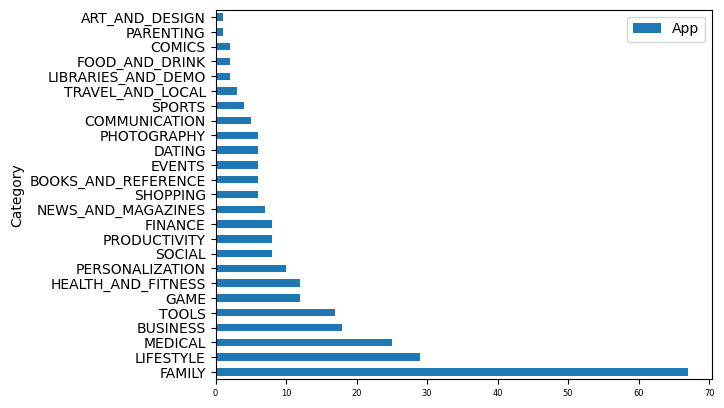

In [128]:
df_1.plot(kind='barh')
plt.xticks( size=6)
plt.show()

## 3-Qual a média de rating para cada categoria de app, mostrar as 10 maiores

In [129]:
df[['Category', 'Rating']].groupby('Category').mean().sort_values('Rating', ascending=False).head(10).reset_index()

,Category,Rating
0,EVENTS,4.435556
1,EDUCATION,4.364407
2,ART_AND_DESIGN,4.357377
3,BOOKS_AND_REFERENCE,4.344970
4,PERSONALIZATION,4.332215
5,PARENTING,4.300000
6,BEAUTY,4.278571
7,GAME,4.247368
8,SOCIAL,4.247291
9,WEATHER,4.243056


## 4-Quais são os apps com mais reviews

In [130]:
df[['App', 'Reviews']].sort_values('Reviews', ascending=False).reset_index(drop=True).head(15)

,App,Reviews
0,Facebook,78158306.0
1,WhatsApp Messenger,69119316.0
2,Instagram,66577313.0
3,Messenger – Text and Video Chat for Free,56642847.0
4,Clash of Clans,44891723.0
5,Clean Master- Space Cleaner & Antivirus,42916526.0
6,Subway Surfers,27722264.0
7,YouTube,25655305.0
8,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0
9,Clash Royale,23133508.0


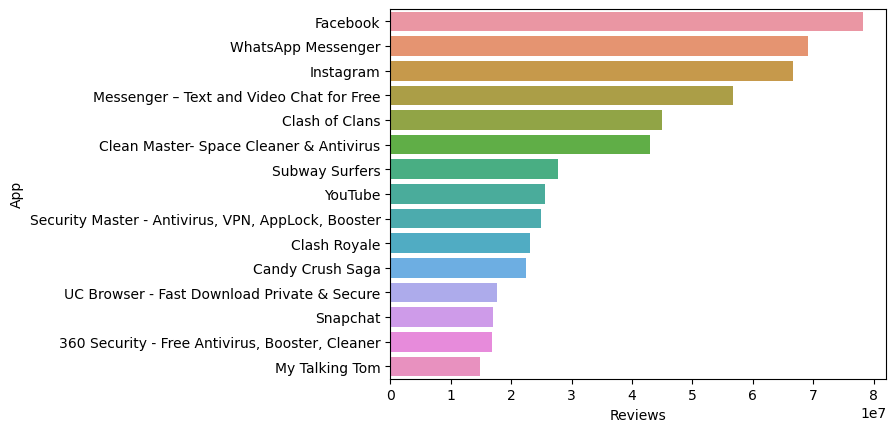

<Figure size 1000x800 with 0 Axes>

In [131]:
df_2 = df[['App', 'Reviews']].sort_values('Reviews', ascending=False).reset_index(drop=True).head(15)
sns.barplot(data=df_2, x='Reviews', y='App', orient='h')
plt.figure(figsize=(10, 8))
plt.show()

## 5-Qual a média de review para cada categoria de app, mostrar as 10 maiores\

In [132]:
df[['Category', 'Reviews']].groupby('Category', as_index=False).mean().sort_values("Reviews", ascending=False).head(10).reset_index(drop=True)

,Category,Reviews
0,SOCIAL,1.122795e+06
1,COMMUNICATION,1.116449e+06
2,GAME,6.823420e+05
3,VIDEO_PLAYERS,4.559735e+05
4,PHOTOGRAPHY,4.005750e+05
5,ENTERTAINMENT,3.408103e+05
6,TOOLS,3.194369e+05
7,SHOPPING,2.475086e+05
8,PRODUCTIVITY,1.846857e+05
9,PERSONALIZATION,1.796737e+05


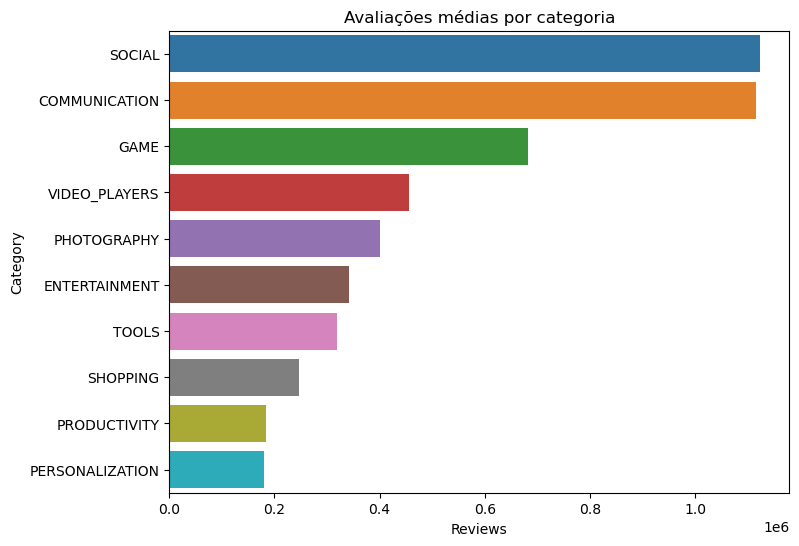

In [133]:
#Vamos suprimir a notação cientifica e plotar um gráfico
#Importante lembrar que ao agrupar fazemos com quem o indice não seja a coluna Category

np.set_printoptions(suppress=True, precision=2)

df_3 = df[['Category', 'Reviews']].groupby('Category', as_index=False).mean().sort_values("Reviews", ascending=False).head(10).reset_index(drop=True)


plt.figure(figsize=(8, 6))
plt.title('Avaliações médias por categoria')

sns.barplot(x='Reviews', y='Category', data=df_3)

plt.show()


## 6-Quais são os apps mais instaldos

In [134]:

df[['App', 'Installs']].sort_values('Installs', ascending=False).head(20).reset_index(drop=True)


,App,Installs
0,Google News,1.000000e+09
1,Google,1.000000e+09
2,Facebook,1.000000e+09
3,Instagram,1.000000e+09
4,Messenger – Text and Video Chat for Free,1.000000e+09
5,WhatsApp Messenger,1.000000e+09
6,Google Chrome: Fast & Secure,1.000000e+09
7,Gmail,1.000000e+09
8,Google+,1.000000e+09
9,Hangouts,1.000000e+09


## 7-Quais são as categorias que mais aparecem dentro dos 20 apps mais instalados?

In [135]:
df_4 = df[['App', 'Installs', 'Category']].sort_values('Installs', ascending=False).head(20).reset_index(drop=True)

df_4[['App','Category']].groupby('Category').agg('count').sort_values('App', ascending=False)

,App
Category,
COMMUNICATION,6
SOCIAL,3
TRAVEL_AND_LOCAL,2
VIDEO_PLAYERS,2
BOOKS_AND_REFERENCE,1
ENTERTAINMENT,1
GAME,1
NEWS_AND_MAGAZINES,1
PHOTOGRAPHY,1


## 8-Quais são os apps com menor rating

In [148]:
df[['App', 'Rating']].sort_values('Rating', ascending=True).head(15).reset_index(drop=True)

,App,Rating
0,Familial Hypercholesterolaemia Handbook,1.0
1,DS Creator 2.0,1.0
2,Truck Driving Test Class 3 BC,1.0
3,DT future1 cam,1.0
4,CR Magazine,1.0
5,MbH BM,1.0
6,House party - live chat,1.0
7,Lottery Ticket Checker - Florida Results & Lotto,1.0
8,CB Mobile Biz,1.0
9,Tech CU Card Manager,1.0


## 9-Quais as categorias de app menos instalados

In [152]:
df[['Category','Installs']].groupby('Category', as_index=False).sum().sort_values('Installs').head(5).reset_index(drop=True)

,Category,Installs
0,EVENTS,15949410.0
1,BEAUTY,26916200.0
2,PARENTING,31116110.0
3,MEDICAL,38152676.0
4,COMICS,44931100.0


## 10-Quais são os apps com menos reviews

In [154]:
df[['App', 'Reviews']].sort_values('Reviews', ascending=True).head(15).reset_index(drop=True)

,App,Reviews
0,MbH BM,1.0
1,EJ messenger,1.0
2,i am EB,1.0
3,AJ Rafael Music Lessons,1.0
4,DH-UFO,1.0
5,CN Resident,1.0
6,BS-Mobile,1.0
7,Labs on Demand,1.0
8,LC-DB,1.0
9,Ek Kahani Aisi Bhi Season 3 - The Horror Story,1.0


## 11-Qual a média de rating dos apps pagos?


In [165]:
df['Rating'].loc[df['Type']=='Paid'].mean()

4.259602649006619